In [92]:
import pandas as pd

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#more code to be commited!

In [451]:
path = "data/survey.csv"
cta_df = pd.read_csv(path)


In [452]:
type(cta_df)

pandas.core.frame.DataFrame

In [453]:
cta_df.head()

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
0,2023/11/15 3:36:37 PM GMT,sanju,Increases,Spontaneous,Bright,Wait,Follower,Tidy
1,2023/11/15 3:37:33 PM GMT,77,Decreases,Spontaneous,Dimmed,Wait,Leader,Messy
2,2023/11/15 3:38:32 PM GMT,Kuba,Decreases,Planner,Dimmed,Wait,Leader,Tidy
3,2023/11/15 3:39:04 PM GMT,Raz,Increases,Spontaneous,Dimmed,Start,Leader,Messy
4,2023/11/15 3:42:46 PM GMT,Govod,Decreases,Planner,Dimmed,Wait,Follower,Messy


In [454]:
cta_df.Room.value_counts()

Room
Messy    11
Tidy      7
Name: count, dtype: int64

In [455]:
cta_df.Social_energy.value_counts()

Social_energy
Decreases    10
Increases     8
Name: count, dtype: int64

In [456]:
cta_df.Team_role.value_counts()

Team_role
Leader      11
Follower     7
Name: count, dtype: int64

In [457]:
cta_df[14:17]

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
14,2023/11/16 10:19:26 AM GMT,Omot,Increases,Spontaneous,Bright,Wait,Leader,Messy
15,2023/11/16 11:30:36 AM GMT,My name,Increases,Spontaneous,Bright,Wait,Leader,Messy
16,2023/11/16 12:11:26 PM GMT,night bitch,Increases,Spontaneous,Dimmed,Start,Follower,Messy


In [458]:
cta_df.Lighting

0     Bright
1     Dimmed
2     Dimmed
3     Dimmed
4     Dimmed
5     Dimmed
6     Bright
7     Bright
8     Bright
9     Dimmed
10    Dimmed
11    Dimmed
12    Dimmed
13    Dimmed
14    Bright
15    Bright
16    Dimmed
17    Dimmed
Name: Lighting, dtype: object

In [459]:
cta_df.columns

Index(['Date', 'Nickname', 'Social_energy', 'Impulsivity', 'Lighting',
       'Ideation', 'Team_role', 'Room'],
      dtype='object')

In [460]:
display(cta_df)

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
0,2023/11/15 3:36:37 PM GMT,sanju,Increases,Spontaneous,Bright,Wait,Follower,Tidy
1,2023/11/15 3:37:33 PM GMT,77,Decreases,Spontaneous,Dimmed,Wait,Leader,Messy
2,2023/11/15 3:38:32 PM GMT,Kuba,Decreases,Planner,Dimmed,Wait,Leader,Tidy
3,2023/11/15 3:39:04 PM GMT,Raz,Increases,Spontaneous,Dimmed,Start,Leader,Messy
4,2023/11/15 3:42:46 PM GMT,Govod,Decreases,Planner,Dimmed,Wait,Follower,Messy
5,2023/11/15 3:44:32 PM GMT,Kerri (Kez in High School),Decreases,Planner,Dimmed,Wait,Leader,Tidy
6,2023/11/15 3:48:37 PM GMT,OOO,Decreases,Planner,Bright,Start,Follower,Messy
7,2023/11/15 3:51:10 PM GMT,J,Decreases,Spontaneous,Bright,Wait,Leader,Tidy
8,2023/11/15 4:02:31 PM GMT,Jin,Increases,Planner,Bright,Start,Leader,Messy
9,2023/11/15 4:27:45 PM GMT,Hmmm,Decreases,Spontaneous,Dimmed,Start,Leader,Messy


In [464]:
cta_df.loc[cta_df.Nickname == "Yong"]

,Date,Nickname,Social_energy,Impulsivity,Lighting,Ideation,Team_role,Room
17,2023/11/20 11:17:00 AM GMT,Yong,Decreases,Planner,Dimmed,Start,Follower,Tidy


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Increases'),
  Text(1, 0, 'Decreases'),
  Text(2, 0, 'Spontaneous'),
  Text(3, 0, 'Planner'),
  Text(4, 0, 'Bright'),
  Text(5, 0, 'Dimmed'),
  Text(6, 0, 'Wait'),
  Text(7, 0, 'Start'),
  Text(8, 0, 'Follower'),
  Text(9, 0, 'Leader'),
  Text(10, 0, 'Tidy'),
  Text(11, 0, 'Messy')])

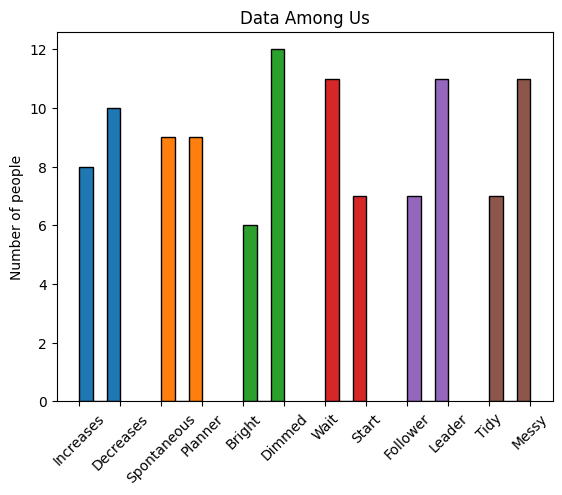

In [465]:
#all factors
plt.hist(cta_df.Social_energy, bins = 3, edgecolor='black')
plt.hist(cta_df.Impulsivity, bins = 3, edgecolor='black')
plt.hist(cta_df.Lighting, bins = 3, edgecolor='black')
plt.hist(cta_df.Ideation, bins = 3, edgecolor='black')
plt.hist(cta_df.Team_role, bins = 3, edgecolor='black')
plt.hist(cta_df.Room, bins = 3, edgecolor='black')


plt.ylabel('Number of people')
plt.title('Data Among Us')
plt.xticks(rotation=45)


In [ ]:
# 1 - ROOM ORGANISATION

Text(0.5, 1.0, 'Room organisation')

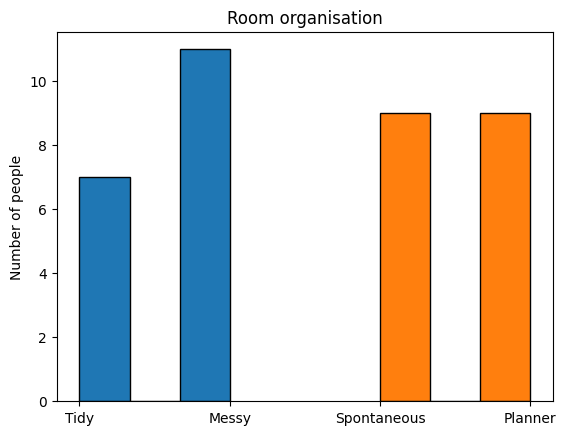

In [466]:
plt.hist(cta_df.Room, bins = 3, edgecolor='black')
plt.ylabel('Number of people')
plt.title('Room organisation')

plt.hist(cta_df.Impulsivity, bins = 3, edgecolor='black')
plt.ylabel('Number of people')
plt.title('Room organisation')

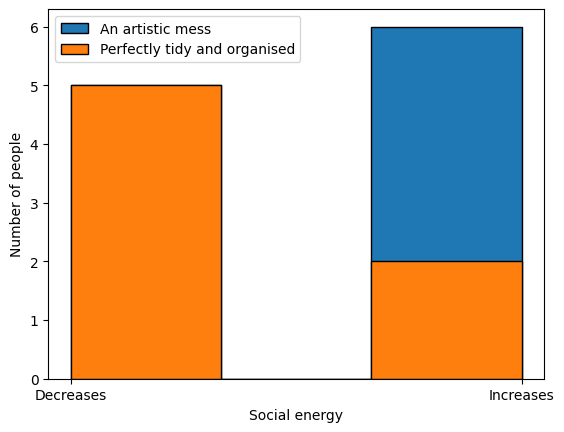

In [468]:
# Experiment 1 - Room organisation in relation to Social energy. 

# Results: 5 people have messy rooms and decreased social energy, 4 people have tidy room and decreased social energy
# 6 people have messy rooms and increased social energy, 2 people have tidy rooms and increased social energy

# Takeaway: the majority of people with tidy rooms feel decrease in their social battery,
# however people with messy rooms feel both increase and decrease almost equally!

cta_room_groupings = cta_df.groupby('Room')

messy_folks = cta_room_groupings.get_group('Messy')
tidy_folks = cta_room_groupings.get_group('Tidy')

plt.hist(messy_folks.Social_energy, bins=3, label='An artistic mess', edgecolor='black')
plt.hist(tidy_folks.Social_energy, bins=3, label='Perfectly tidy and organised', edgecolor='black')

plt.xlabel('Social energy')
plt.ylabel('Number of people')
plt.legend()

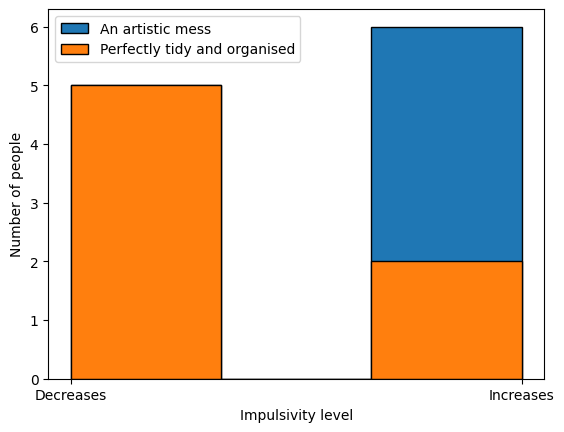

In [469]:
# Experiment 2 - Room organisation in relation to Impulsivity. <3
# Results: 
# Takeaway: All of the people with messy rooms are spontaneous, as well as a small portion of people with tidy rooms.

plt.hist(messy_folks.Social_energy, bins=3, label='An artistic mess', edgecolor='black')
plt.hist(tidy_folks.Social_energy, bins=3, label='Perfectly tidy and organised', edgecolor='black',)

plt.xlabel('Impulsivity level')
plt.ylabel('Number of people')
plt.legend()

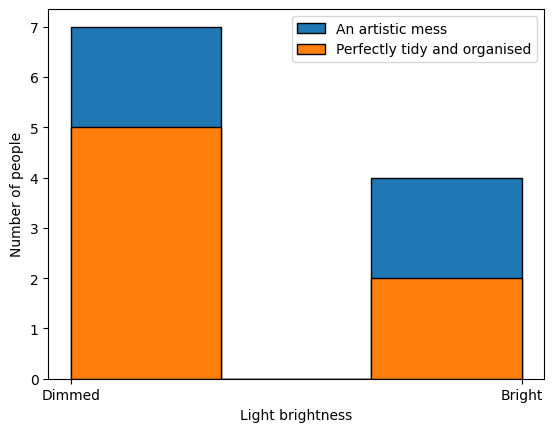

In [470]:
plt.hist(messy_folks.Lighting, label='An artistic mess', bins=3, edgecolor='black')
plt.hist(tidy_folks.Lighting, label='Perfectly tidy and organised', bins=3, edgecolor='black')

plt.xlabel('Light brightness')
plt.ylabel('Number of people')
plt.legend()

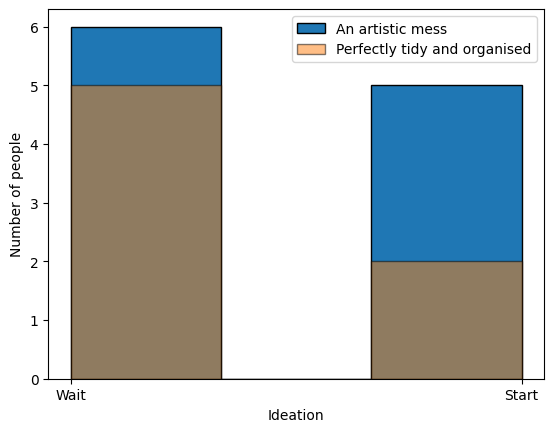

In [471]:
plt.hist(messy_folks.Ideation, label='An artistic mess', bins=3, edgecolor='black')
plt.hist(tidy_folks.Ideation, label='Perfectly tidy and organised', bins=3, edgecolor='black', alpha= 0.5)

plt.xlabel('Ideation')
plt.ylabel('Number of people')
plt.legend()

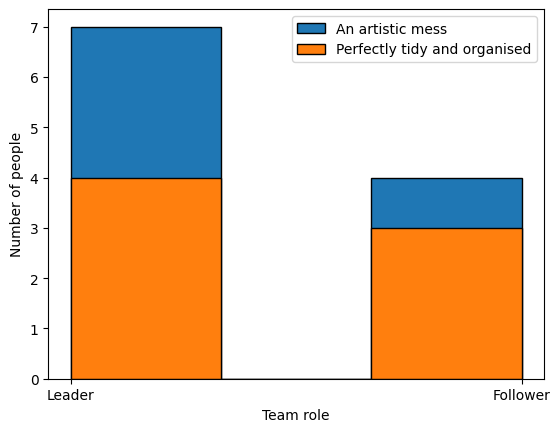

In [472]:
plt.hist(messy_folks.Team_role,label='An artistic mess', bins=3, edgecolor='black')
plt.hist(tidy_folks.Team_role, label='Perfectly tidy and organised', bins=3, edgecolor='black')

plt.xlabel('Team role')
plt.ylabel('Number of people')
plt.legend()

In [ ]:
#2 - TEAM ROLE

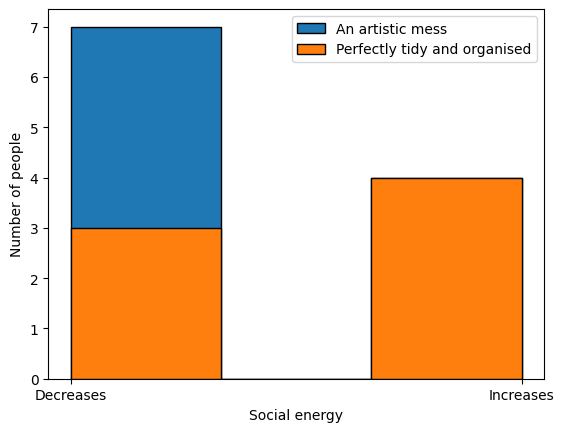

In [474]:
cta_team_groupings = cta_df.groupby('Team_role')

leader_folks = cta_team_groupings.get_group('Leader')
follower_folks = cta_team_groupings.get_group('Follower')

plt.hist(leader_folks.Social_energy, bins=3, label='An artistic mess', edgecolor='black')
plt.hist(follower_folks.Social_energy, bins=3, label='Perfectly tidy and organised', edgecolor='black')

plt.xlabel('Social energy')
plt.ylabel('Number of people')
plt.legend()

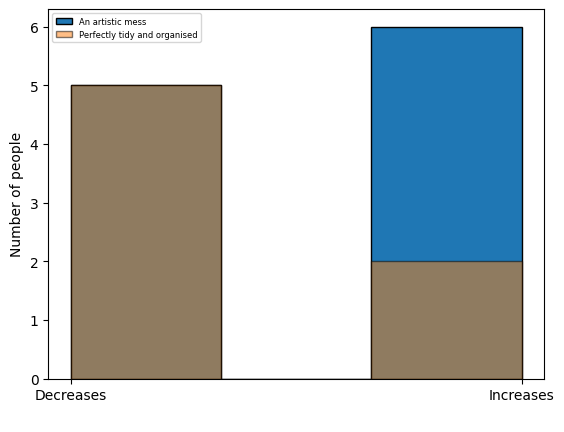

In [475]:
# Experiment 2 - Room organisation in relation to Impulsivity. <3
# Results: 
# Takeaway: All of the people with messy rooms are spontaneous, as well as a small portion of people with tidy rooms.

cta_room_groupings = cta_df.groupby('Room')

messy_folks = cta_room_groupings.get_group('Messy')
tidy_folks = cta_room_groupings.get_group('Tidy')

plt.hist(messy_folks.Social_energy, bins=3, label='An artistic mess', edgecolor='black')
plt.hist(tidy_folks.Social_energy, bins=3, label='Perfectly tidy and organised', edgecolor='black', alpha= 0.5)


plt.xlabel(' ')
plt.ylabel('Number of people')
plt.legend(fontsize="6")

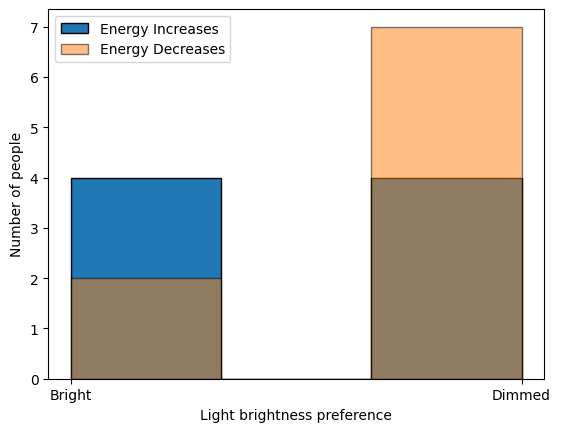

In [443]:
#Experiment 4 - Social energy in relation to light brightness. 
#Takeaway: the majority of people prefer dimmed light, but especially people who feel decrease in theienergy level in social situations
cta_social_groupings = cta_df.groupby('Social_energy')

extra_folks = cta_social_groupings.get_group('Increases')
intro_folks = cta_social_groupings.get_group('Decreases')

plt.hist(extra_folks.Lighting, bins=3, label='Energy Increases', edgecolor='black')
plt.hist(intro_folks.Lighting, bins=3, label='Energy Decreases', edgecolor='black',  alpha = 0.5)

plt.xlabel('Light brightness preference')
plt.ylabel('Number of people')
plt.legend()

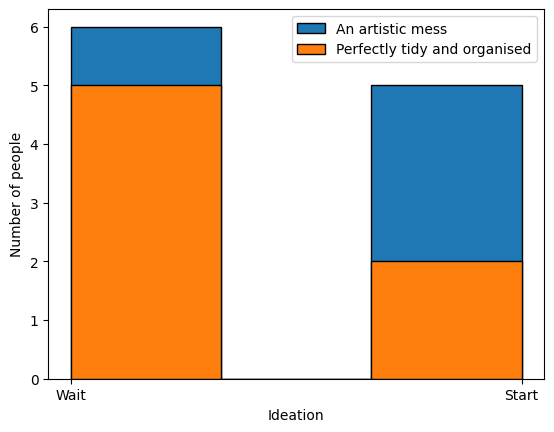

In [476]:
#Experiment 4 - Room organisation in relation to idea generation. 
#Takeaway: The majority of people with organised rooms prefer to hold onto idea longer, 
cta_room_groupings = cta_df.groupby('Room')

messy_folks = cta_room_groupings.get_group('Messy')
tidy_folks = cta_room_groupings.get_group('Tidy')

plt.hist(messy_folks.Ideation, bins=3, label='An artistic mess', edgecolor='black')
plt.hist(tidy_folks.Ideation, bins=3, label='Perfectly tidy and organised', edgecolor='black')

plt.xlabel('Ideation')
plt.ylabel('Number of people')
plt.legend()

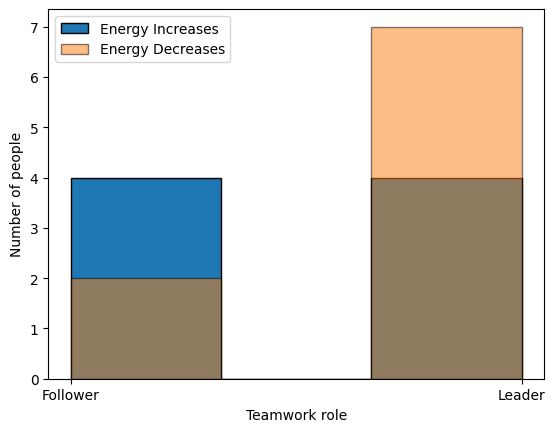

In [445]:
#Experiment 4 - Social energy in relation to teamwork role /// might be the most interesting one
#Takeaway: the majority of people consider themselves leaders, however their energy level decrease after social situations
cta_social_groupings = cta_df.groupby('Social_energy')

extra_folks = cta_social_groupings.get_group('Increases')
intro_folks = cta_social_groupings.get_group('Decreases')

plt.hist(extra_folks.Team_role, bins=3, label='Energy Increases', edgecolor='black')
plt.hist(intro_folks.Team_role, bins=3, label='Energy Decreases', edgecolor='black', alpha = 0.5)

plt.xlabel('Teamwork role')
plt.ylabel('Number of people')
plt.legend()

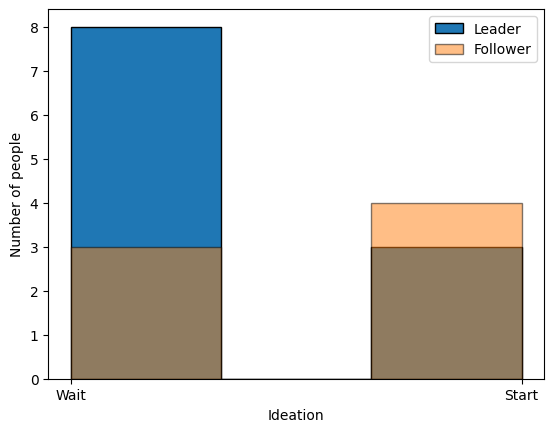

In [477]:
#Experiment 5 - Teamwork role in relation to ideation
#Takeaway: The majority of leaders prefer to hold the idea before starting
cta_team_groupings = cta_df.groupby('Team_role')

leader_folks = cta_team_groupings.get_group('Leader')
follower_folks = cta_team_groupings.get_group('Follower')


plt.hist(leader_folks.Ideation, bins=3, label='Leader', edgecolor='black')
plt.hist(follower_folks.Ideation, bins=3, label='Follower', edgecolor='black', alpha = 0.5)

plt.xlabel('Ideation')
plt.ylabel('Number of people')
plt.legend()
